In [1]:
import pandas as pd
import os

In [2]:
os.getcwd()

'C:\\Users\\admin\\Desktop\\Python\\Section6'

In [3]:
movies= pd.read_csv("Movie-Ratings.csv")

In [4]:
len(movies)

559

In [5]:
movies.head()


,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [22]:
movies.columns=['Film','Genre','CriticRating','AudienceRating','BudgetMillions','Year']

In [8]:
movies.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film              559 non-null object
Genre             559 non-null object
CriticRatings     559 non-null int64
AudienceRating    559 non-null int64
BudgetMillions    559 non-null int64
Year              559 non-null int64
dtypes: int64(4), object(2)
memory usage: 26.3+ KB


In [9]:
movies.describe()

,CriticRatings,AudienceRating,BudgetMillions,Year
count,559.000000,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136,2009.152057
std,26.413091,16.826887,48.731817,1.362632
min,0.000000,0.000000,0.000000,2007.000000
25%,25.000000,47.000000,20.000000,2008.000000
50%,46.000000,58.000000,35.000000,2009.000000
75%,70.000000,72.000000,65.000000,2010.000000
max,97.000000,96.000000,300.000000,2011.000000


In [11]:
movies['Film']=movies['Film'].astype('category')

In [12]:
movies.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film              559 non-null category
Genre             559 non-null object
CriticRatings     559 non-null int64
AudienceRating    559 non-null int64
BudgetMillions    559 non-null int64
Year              559 non-null int64
dtypes: category(1), int64(4), object(1)
memory usage: 47.4+ KB


In [13]:
movies['Genre']=movies['Genre'].astype('category')
movies['Year']=movies['Year'].astype('category')

In [17]:
movies.Genre.cat.categories

Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')

In [19]:
movies.describe()

,CriticRatings,AudienceRating,BudgetMillions
count,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136
std,26.413091,16.826887,48.731817
min,0.000000,0.000000,0.000000
25%,25.000000,47.000000,20.000000
50%,46.000000,58.000000,35.000000
75%,70.000000,72.000000,65.000000
max,97.000000,96.000000,300.000000


In [20]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

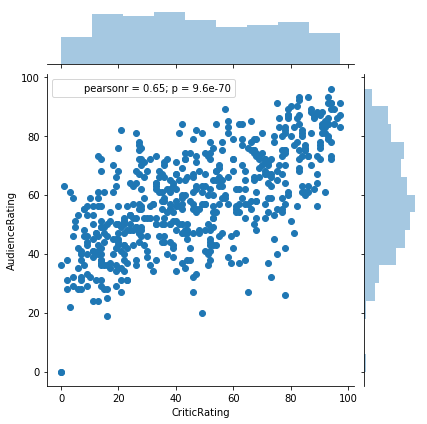

In [23]:
#joint plot 
j=sns.jointplot(data=movies, x='CriticRating',y='AudienceRating')

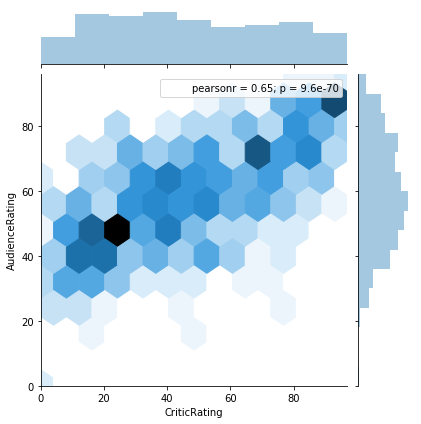

In [24]:
j=sns.jointplot(data=movies, x='CriticRating',y='AudienceRating',kind='hex')   #can change kind

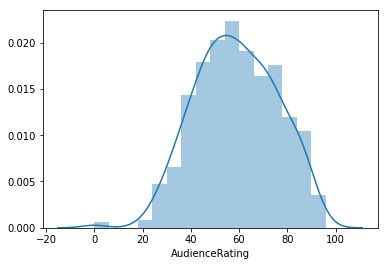

In [26]:
#Histograms
ml = sns.distplot(movies.AudienceRating)

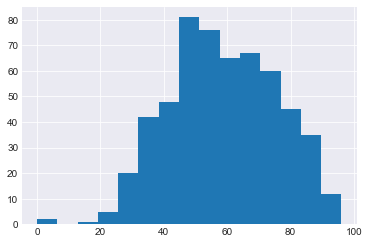

In [30]:
sns.set_style('darkgrid')
n1=plt.hist(movies.AudienceRating,bins=15)     #plt is thoda sa downgrade 

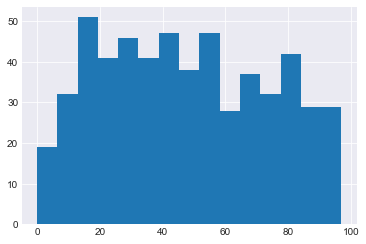

In [31]:
n1=plt.hist(movies.CriticRating,bins=15) 

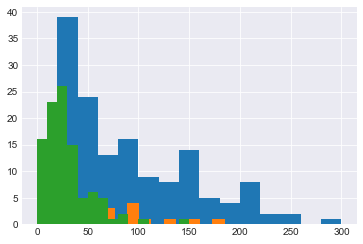

In [37]:
#Stacked Histogram 
#plt.hist(movies.BudgetMillions)
#plt.show()  
#we need filtering say for seeing the budget for a particular genre, this is how we do it 
#movies[movies.Genre == 'Drama'].BudgetMillions

plt.hist(movies[movies.Genre == 'Action'].BudgetMillions,bins=15)
plt.hist(movies[movies.Genre == 'Thriller'].BudgetMillions,bins=15)
plt.hist(movies[movies.Genre == 'Drama'].BudgetMillions,bins=15)
plt.show()


## We dont want this, not stacked 
## Use a list 


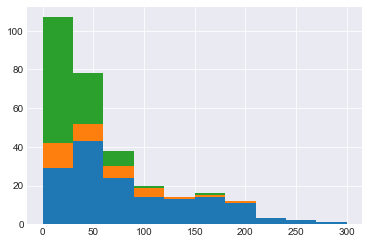

In [39]:
List=[movies[movies.Genre == 'Action'].BudgetMillions,movies[movies.Genre == 'Thriller'].BudgetMillions,movies[movies.Genre == 'Drama'].BudgetMillions]
plt.hist(List,stacked=True)
plt.show()  #automate this through a loop

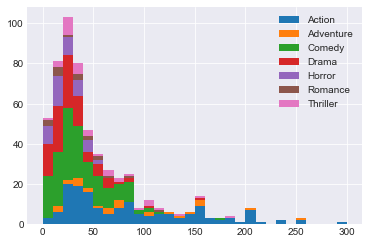

In [51]:
List2 = list()
MyLabels=list()
for gen in movies.Genre.cat.categories:
    List2.append(movies[movies.Genre == gen].BudgetMillions)
    MyLabels.append(gen)
test=plt.hist(List2,bins=30,stacked=True,rwidth=1,label=MyLabels)    
plt.legend()
plt.show()

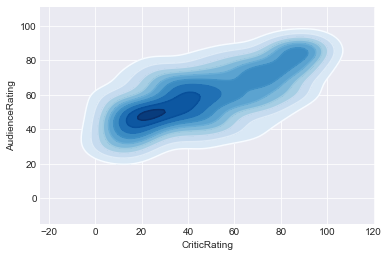

In [63]:
#KDE PLOT 
test2=sns.kdeplot(movies.CriticRating,movies.AudienceRating,shade=True,shade_lowest=False,cmap='Blues')
test2=sns.kdeplot(movies.CriticRating,movies.AudienceRating,cmap='Blues')


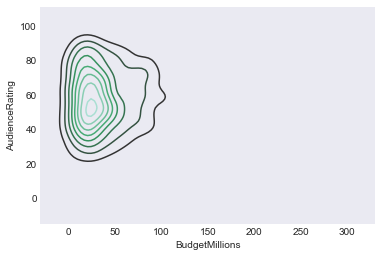

In [69]:
#Working with SubPlots()
sns.set_style('dark')
test3=sns.kdeplot(movies.BudgetMillions,movies.AudienceRating)


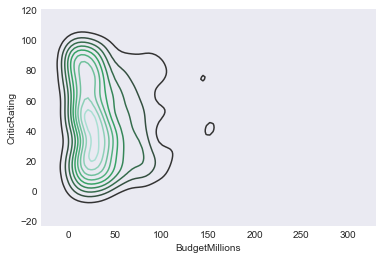

In [68]:
test3=sns.kdeplot(movies.BudgetMillions,movies.CriticRating)

[(-20, 160)]

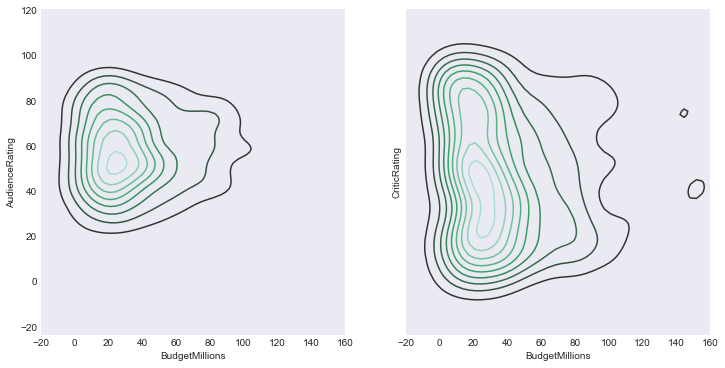

In [75]:
f1, axis=plt.subplots(1,2,figsize=(12,6),sharex=True,sharey=True)
k1=sns.kdeplot(movies.BudgetMillions, movies.AudienceRating,ax=axis[0])
k2=sns.kdeplot(movies.BudgetMillions, movies.CriticRating,ax=axis[1])
k1.set(xlim=(-20,160))


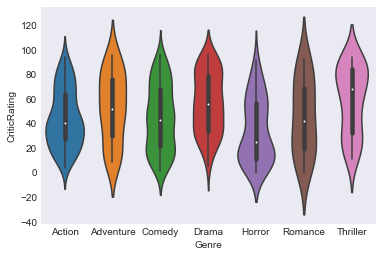

In [77]:
#ViolinPlots

k1=sns.violinplot(data=movies, x='Genre',y='CriticRating')

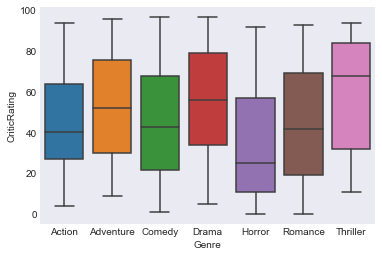

In [78]:
k1=sns.boxplot(data=movies, x='Genre',y='CriticRating')

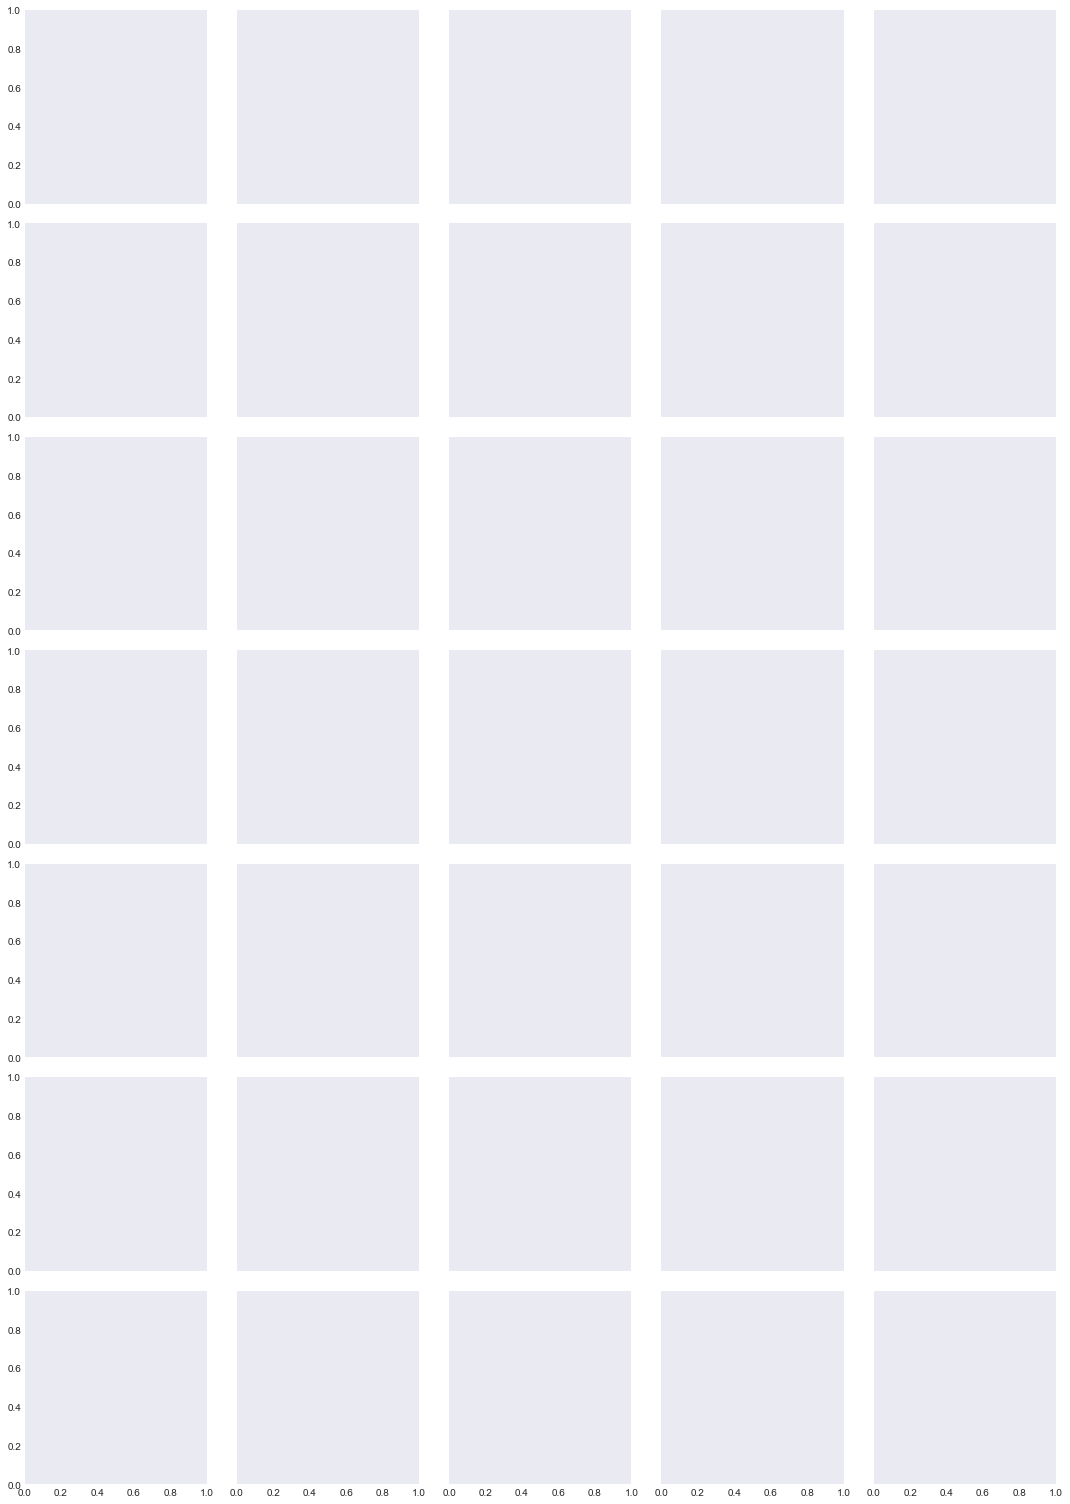

In [82]:
#FacetGrid
fg=sns.FacetGrid(movies, row='Genre',col='Year', hue='Genre')

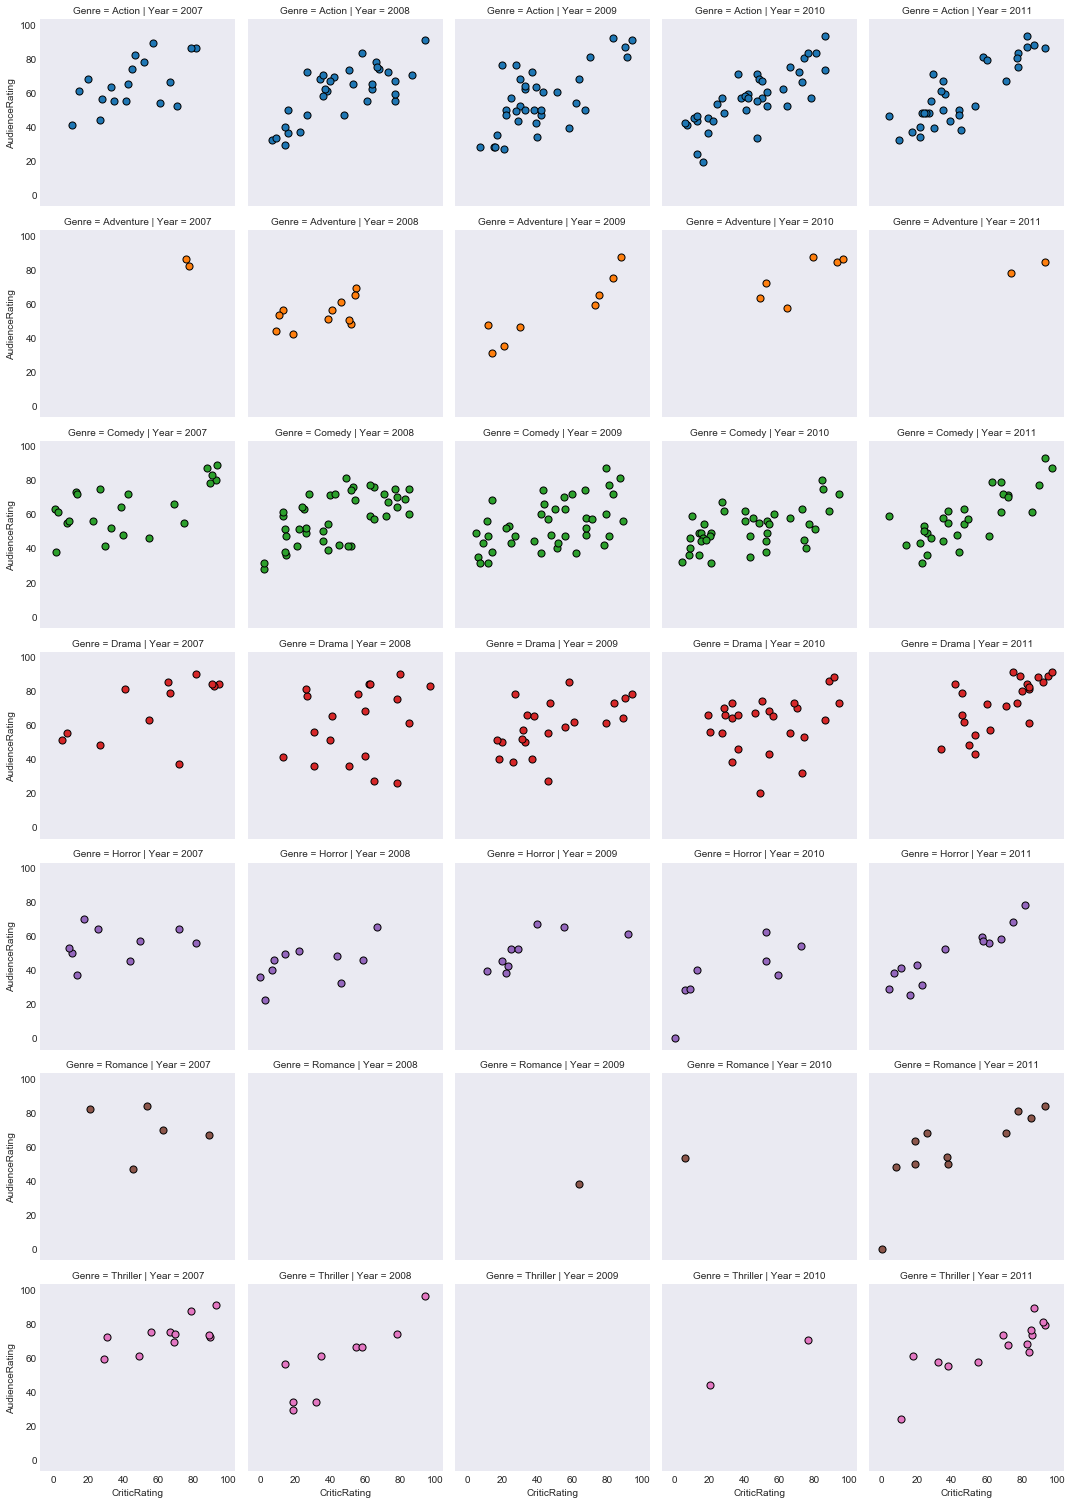

In [88]:
fg=sns.FacetGrid(movies, row='Genre',col='Year', hue='Genre')
kws=dict(s=50,linewidth=1.0,edgecolor='black')
fg=fg.map(plt.scatter,'CriticRating','AudienceRating',**kws)               #any type of chart works

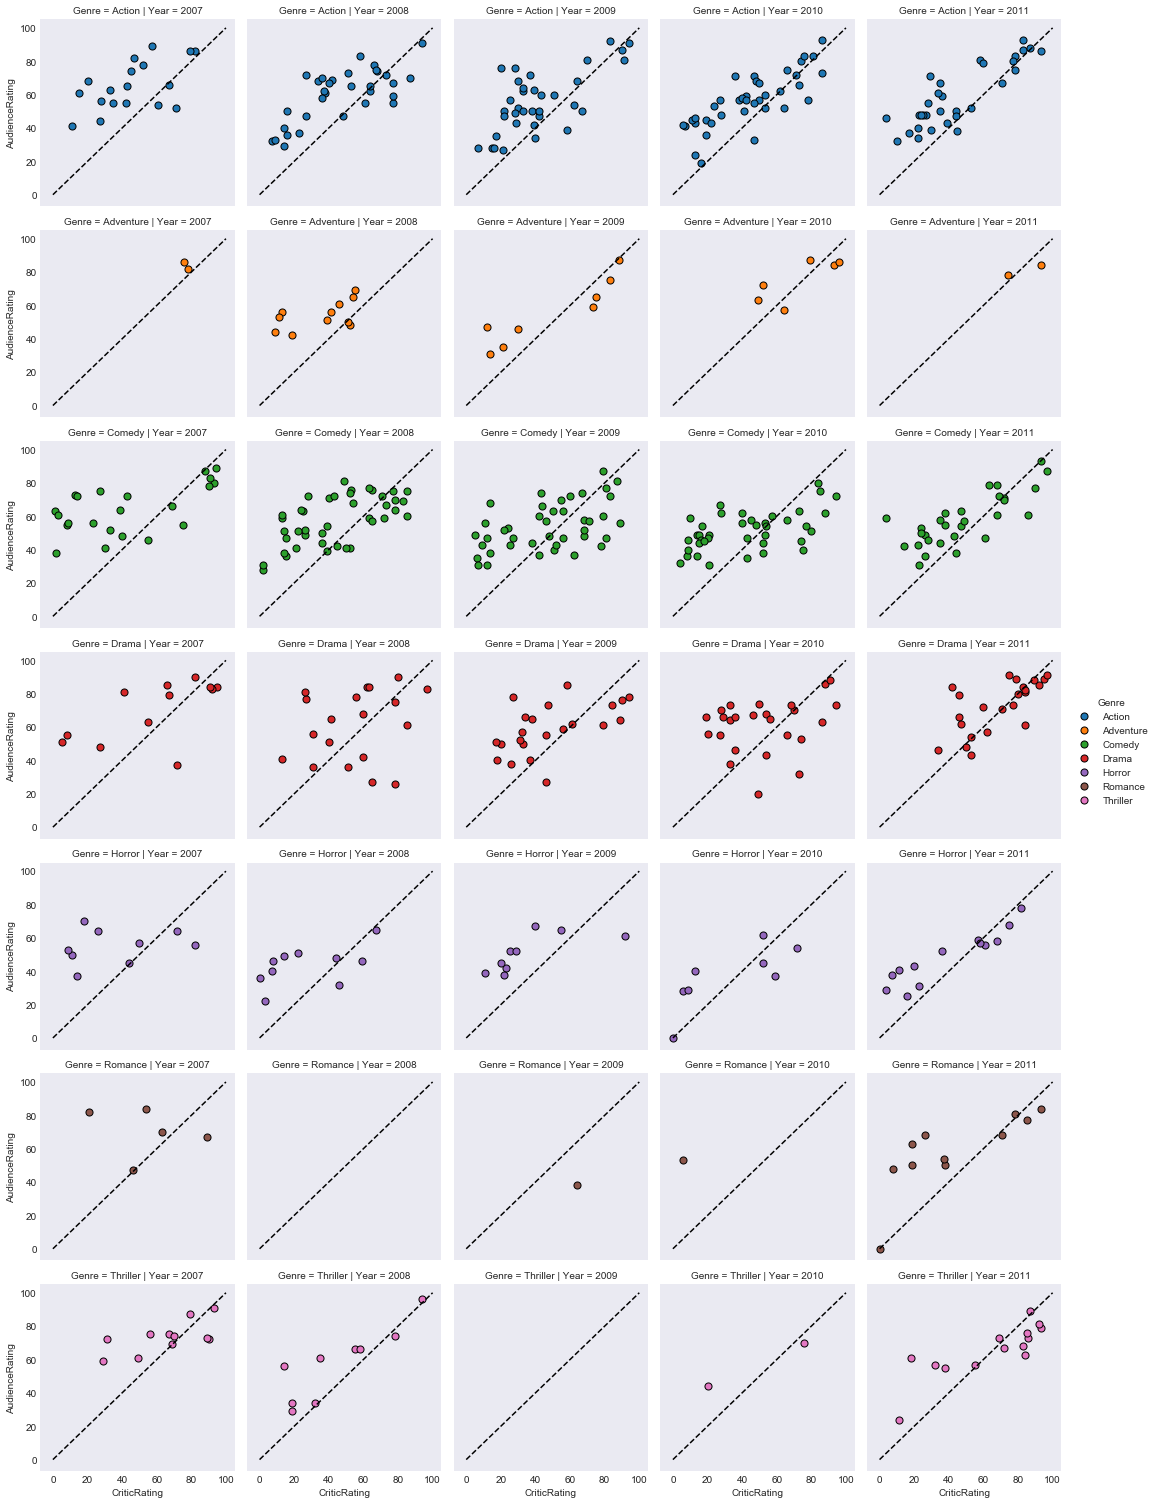

In [91]:
fg=sns.FacetGrid(movies, row='Genre',col='Year', hue='Genre')
kws=dict(s=50,linewidth=1.0,edgecolor='black')
fg=fg.map(plt.scatter,'CriticRating','AudienceRating',**kws) 
for i in fg.axes.flat:
    i.plot((0,100),(0,100),c='black',ls='--')
fg.add_legend()    